This notebook explores the possible correlations between number of counts per subject and demographic characteristics

In [116]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
pd.set_option('display.max_rows',None)

Importing files

In [117]:
PATH = 'K:/Documents/TCGA/count_matrix2.csv.gz'

###Use the code below if you want to see all the columns and only 5 rows (for example)
df_tmp = pd.read_csv(PATH)

In [118]:
df_tmp.head(5)

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,r1000 uniq SVA_F paired human Q10 aligned,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned
0,02-2483-01A,566024474,5217,5099,2469,2451,2441,2420,2286,2286,...,1311,1187,1187,2170,1474,1359,1303,1290,1170,1170
1,02-2483-10A,579304076,4735,4646,2212,2202,2192,2175,2037,2037,...,1186,1090,1090,1878,1321,1222,1177,1170,1076,1076
2,02-2485-01A,575060540,5140,5047,2419,2402,2392,2374,2229,2229,...,1281,1184,1184,2217,1443,1326,1268,1261,1167,1167
3,02-2485-10A,478851061,3895,3849,1947,1935,1928,1914,1783,1783,...,1200,1108,1108,1860,1325,1231,1189,1184,1094,1094
4,06-0125-01A,1066268796,8464,8384,3521,3497,3483,3450,3292,3292,...,2088,1810,1810,5507,2700,2293,2099,2068,1794,1794


This code will show the unique values. However, note that is taking the Normal and Tumor tissue in account.

In [119]:
print(df_tmp['subject'].value_counts())

HT-7475-01A    1
14-1823-01A    1
DU-5849-10A    1
E1-5307-10A    1
DU-7304-02A    1
DU-5870-02A    1
TQ-A7RK-02A    1
DU-7013-10A    1
DU-6408-10A    1
DU-6404-10A    1
14-2554-10A    1
HT-7468-01A    1
E1-5305-01A    1
06-0745-10A    1
DU-6542-10A    1
02-2485-01A    1
CS-6665-10A    1
FG-7643-01A    1
DU-6392-10A    1
06-0171-10A    1
E1-5305-10A    1
06-0125-02A    1
DU-7292-10A    1
06-5415-10A    1
DB-5279-10A    1
06-0190-02A    1
DU-5849-01A    1
TQ-A7RK-02B    1
DU-6405-10A    1
EZ-7264-01A    1
CS-5396-01A    1
06-0171-02A    1
FG-A4MT-02A    1
19-1389-02A    1
06-0211-02A    1
14-1402-01A    1
HT-7695-10A    1
DU-6407-02B    1
E1-5319-10A    1
06-0221-01A    1
CS-4938-01B    1
DU-5874-10A    1
CS-5390-10A    1
DU-6408-01A    1
E1-5319-01A    1
HT-7604-01A    1
FN-7833-10A    1
TQ-A8XE-02A    1
DU-7290-01A    1
15-1444-10A    1
14-1034-01A    1
06-0157-10A    1
HT-7689-10A    1
CS-6186-10A    1
HT-7689-01A    1
HT-7481-01A    1
DU-6404-01A    1
FN-7833-01A    1
TM-A7CF-01A   

Extracts the IDs and remove the sample to later clean up the demographics sample.

In [120]:
ids=df_tmp['subject']
ids.to_list()
remove = ['-01A', '-02B', '-10A', '-02A','-10B','-10D', '-11A', '-01B', 'TCGA-']
ids = pd.Series(ids)
ids = ids.str.replace('|'.join(map(re.escape, remove)),'')
ids.tolist()
print(len(ids))

274


In [121]:
filtered_id = []
for i in ids:
    if i not in filtered_id:
        filtered_id.append(i)
print(len(filtered_id))

125


Importing the demographics data

In [122]:
meta_path = 'K:/Documents/TCGA/TCGA.Glioma.metadata.tsv' 
meta_data = pd.read_csv(meta_path,sep='\t')
meta_data.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.762054,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.731106,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.334941,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.333034,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.162705,1.0


Filtering the available data

In [123]:
meta_data['case_submitter_id'] = meta_data['case_submitter_id'].str.replace('|'.join(map(re.escape, remove)),'')
meta_data['case_submitter_id'] = meta_data['case_submitter_id'].apply(str)
booleans = meta_data.case_submitter_id.isin(filtered_id)
meta_data = meta_data[booleans]
meta_data.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
90,02-2483,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,glioblastoma:IDH-Mutant:1p19q-non-codel,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0
91,02-2485,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0
96,06-0125,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
119,06-0152,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,Henry Ford Hospital,NaN,68.0,12.320588,1.0
123,06-0157,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.186925,1.0


### Table 1

In [124]:
table1 = [meta_data['gender'].value_counts(), meta_data['race'].value_counts(), meta_data['ethnicity'].value_counts(), 
          meta_data['primary_diagnosis'].value_counts(), meta_data['Vital_status'].value_counts(), meta_data['Age'].describe()]
table1

[male      72
 female    53
 Name: gender, dtype: int64,
 white                        114
 black or african american      7
 not reported                   3
 asian                          1
 Name: race, dtype: int64,
 not hispanic or latino    108
 not reported               11
 hispanic or latino          6
 Name: ethnicity, dtype: int64,
 Glioblastoma                     35
 Oligodendroglioma, NOS           33
 Astrocytoma, anaplastic          24
 Mixed glioma                     16
 Astrocytoma, NOS                  9
 Oligodendroglioma, anaplastic     8
 Name: primary_diagnosis, dtype: int64,
 0.0    63
 1.0    58
 Name: Vital_status, dtype: int64,
 count    121.000000
 mean      47.545455
 std       14.708274
 min       17.000000
 25%       34.000000
 50%       50.000000
 75%       59.000000
 max       76.000000
 Name: Age, dtype: float64]

### Graphs

#### Histogram of overall age 

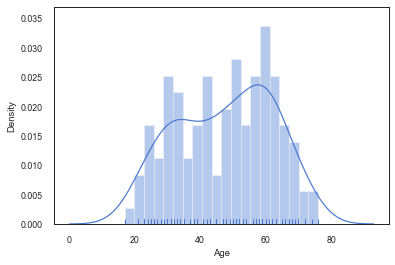

In [125]:
%matplotlib inline
sns.set(context='paper',style='white', palette='muted',color_codes=True)
sns.distplot(meta_data['Age'], hist=True, rug=True, bins=20)
plt.show()

#### Age by type of tumor

Text(0, 0.5, 'Density')

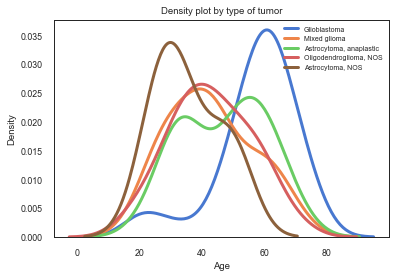

In [126]:
tumors=['Glioblastoma','Mixed glioma','Astrocytoma, anaplastic','Oligodendroglioma, NOS',
        'oligodendroglioma, anaplastic','Astrocytoma, NOS']

for tumor in tumors:
    subset=meta_data[meta_data['primary_diagnosis']==tumor]
    sns.distplot(subset['Age'], hist=False, kde=True, kde_kws={'linewidth':3},
                 label =tumor)
    
plt.legend(prop={'size':7})
plt.title('Density plot by type of tumor')
plt.xlabel('Age')
plt.ylabel('Density')

#### Survival months by type of tumor

<AxesSubplot:xlabel='Survival_months', ylabel='primary_diagnosis'>

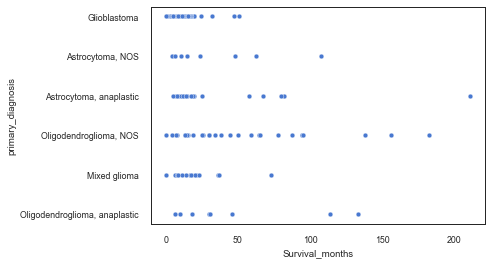

In [127]:
sns.scatterplot(data=meta_data, x='Survival_months',y='primary_diagnosis')

#### Count of IDH status

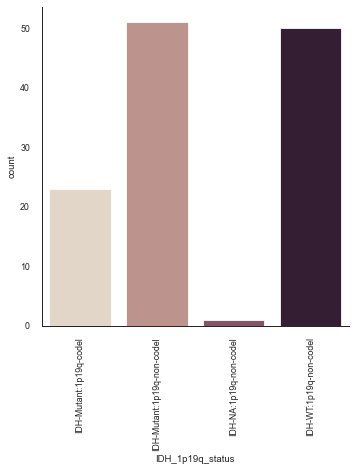

In [128]:
meta_data['IDH_1p19q_status']=meta_data['IDH_1p19q_status'].astype('category')

g1 = sns.catplot(x="IDH_1p19q_status", kind="count", palette="ch:.25", data=meta_data)
g1.set_xticklabels(rotation=90)

## Creating dataframes by each quality level

In [129]:
df_q00 = df_tmp.iloc[:, lambda df_tmp:df_tmp.columns.str.contains('Q00', case=False)]
df_q00.insert(0, 'subject',df_tmp['subject'])
df_q00.insert(1, 'raw pair count',df_tmp['raw pair count'])
#extracts the type of sample
df_q00['sample'] = df_q00['subject'].str.extract(r'\b(\w+)$',expand=True)
df_q00['tissue_sample'] = np.where(df_q00['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_q00['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_q00['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
df_q00['subject'] = df_q00['subject'].map(lambda x: str(x)[:-4])
print(len(df_q00.index))
df_q00.head()

274


,subject,raw pair count,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,HERVK113 paired human Q00 aligned,...,r100000 uniq SVA_F unpaired human Q00 aligned,SVA_F paired human Q00 aligned,uniq SVA_F paired human Q00 aligned,r10 uniq SVA_F paired human Q00 aligned,r100 uniq SVA_F paired human Q00 aligned,r1000 uniq SVA_F paired human Q00 aligned,r10000 uniq SVA_F paired human Q00 aligned,r100000 uniq SVA_F paired human Q00 aligned,sample,tissue_sample
0,02-2483,566024474,5099,2469,2451,2441,2420,2286,2286,1493,...,7672,2632,1805,1642,1548,1528,1367,1367,01A,Primary Tumor
1,02-2483,579304076,4646,2212,2202,2192,2175,2037,2037,1474,...,6483,2296,1626,1494,1416,1402,1279,1279,10A,Normal Blood
2,02-2485,575060540,5047,2419,2402,2392,2374,2229,2229,1671,...,6887,2701,1803,1625,1524,1505,1372,1372,01A,Primary Tumor
3,02-2485,478851061,3849,1947,1935,1928,1914,1783,1783,1162,...,5612,2246,1644,1510,1426,1412,1292,1292,10A,Normal Blood
4,06-0125,1066268796,8384,3521,3497,3483,3450,3292,3292,2720,...,12660,6553,3339,2792,2435,2370,2021,2021,01A,Primary Tumor


In [130]:
print(df_q00['tissue_sample'].value_counts(), '\n', df_q00['sample'].value_counts() )

Normal Blood        123
Primary Tumor       123
Recurrent Tissue     27
Normal Tissue         1
Name: tissue_sample, dtype: int64 
 10A    121
01A    121
02A     22
02B      5
01B      2
10D      1
10B      1
11A      1
Name: sample, dtype: int64


In [131]:
df_q10 = df_tmp.iloc[:, lambda df_tmp:df_tmp.columns.str.contains('Q10', case=False)]
df_q10.insert(0, 'subject',df_tmp['subject'])
df_q10.insert(1, 'raw pair count',df_tmp['raw pair count'])
#extracts the type of sample
df_q10['sample'] = df_q10['subject'].str.extract(r'\b(\w+)$',expand=True)
df_q10['tissue_sample'] = np.where(df_q10['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_q10['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_q10['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
df_q10['subject'] = df_q10['subject'].map(lambda x: str(x)[:-4])
print(len(df_q10.index))
df_q10.head()

274


,subject,raw pair count,HERVK113 unpaired human Q10 aligned,uniq HERVK113 unpaired human Q10 aligned,r10 uniq HERVK113 unpaired human Q10 aligned,r100 uniq HERVK113 unpaired human Q10 aligned,r1000 uniq HERVK113 unpaired human Q10 aligned,r10000 uniq HERVK113 unpaired human Q10 aligned,r100000 uniq HERVK113 unpaired human Q10 aligned,HERVK113 paired human Q10 aligned,...,r100000 uniq SVA_F unpaired human Q10 aligned,SVA_F paired human Q10 aligned,uniq SVA_F paired human Q10 aligned,r10 uniq SVA_F paired human Q10 aligned,r100 uniq SVA_F paired human Q10 aligned,r1000 uniq SVA_F paired human Q10 aligned,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,sample,tissue_sample
0,02-2483,566024474,2910,567,554,550,542,432,432,1345,...,1520,2216,1501,1383,1324,1311,1187,1187,01A,Primary Tumor
1,02-2483,579304076,2687,543,537,535,530,419,419,1333,...,1372,1910,1338,1238,1193,1186,1090,1090,10A,Normal Blood
2,02-2485,575060540,2904,555,542,540,534,419,419,1547,...,1426,2262,1467,1347,1288,1281,1184,1184,01A,Primary Tumor
3,02-2485,478851061,2229,527,516,514,507,406,406,1073,...,1308,1893,1344,1247,1205,1200,1108,1108,10A,Normal Blood
4,06-0125,1066268796,4874,610,594,590,583,460,460,2538,...,1912,5567,2727,2314,2119,2088,1810,1810,01A,Primary Tumor


In [132]:
df_q20 = df_tmp.iloc[:, lambda df_tmp:df_tmp.columns.str.contains('Q20', case=False)]
df_q20.insert(0, 'subject',df_tmp['subject'])
df_q20.insert(1, 'raw pair count',df_tmp['raw pair count'])
#extracts the type of sample
df_q20['sample'] = df_q20['subject'].str.extract(r'\b(\w+)$',expand=True)
df_q20['tissue_sample'] = np.where(df_q20['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_q20['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_q20['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
df_q20['subject'] = df_q20['subject'].map(lambda x: str(x)[:-4])
print(len(df_q20.index))
df_q20.head()

274


,subject,raw pair count,HERVK113 unpaired human Q20 aligned,uniq HERVK113 unpaired human Q20 aligned,r10 uniq HERVK113 unpaired human Q20 aligned,r100 uniq HERVK113 unpaired human Q20 aligned,r1000 uniq HERVK113 unpaired human Q20 aligned,r10000 uniq HERVK113 unpaired human Q20 aligned,r100000 uniq HERVK113 unpaired human Q20 aligned,HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_F unpaired human Q20 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,sample,tissue_sample
0,02-2483,566024474,2894,564,551,547,539,430,430,1328,...,1512,2170,1474,1359,1303,1290,1170,1170,01A,Primary Tumor
1,02-2483,579304076,2673,541,536,534,529,418,418,1308,...,1355,1878,1321,1222,1177,1170,1076,1076,10A,Normal Blood
2,02-2485,575060540,2892,552,539,537,531,417,417,1523,...,1409,2217,1443,1326,1268,1261,1167,1167,01A,Primary Tumor
3,02-2485,478851061,2221,526,515,513,506,406,406,1061,...,1291,1860,1325,1231,1189,1184,1094,1094,10A,Normal Blood
4,06-0125,1066268796,4853,610,594,590,583,460,460,2514,...,1891,5507,2700,2293,2099,2068,1794,1794,01A,Primary Tumor


### Dataframes for raw reads qualities overall

In [133]:
df_aligned = df_tmp.iloc[:,lambda df_tmp: df_tmp.columns.str.contains('paired reads aligned', case=False)]
df_aligned.insert(0, 'subject',df_tmp['subject'])
df_aligned.insert(1, 'raw pair count',df_tmp['raw pair count'])
#extracts the type of sample
df_aligned['sample'] = df_aligned['subject'].str.extract(r'\b(\w+)$',expand=True)
df_aligned['tissue_sample'] = np.where(df_aligned['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_aligned['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_aligned['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
df_aligned['subject'] = df_aligned['subject'].map(lambda x: str(x)[:-4])
print(len(df_aligned.index))
df_aligned.head()

274


,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,SVA_D unpaired reads aligned,SVA_D paired reads aligned,SVA_E unpaired reads aligned,SVA_E paired reads aligned,SVA_F unpaired reads aligned,SVA_F paired reads aligned,sample,tissue_sample
0,02-2483,566024474,5217,3558,29700,18922,24979,16962,26287,17510,26288,17532,26117,17430,12823,8134,01A,Primary Tumor
1,02-2483,579304076,4735,3338,24039,15942,20584,14370,21844,14984,21843,14988,21724,14882,10290,6732,10A,Normal Blood
2,02-2485,575060540,5140,3782,27041,18770,22470,16618,23821,17518,23820,17528,23653,17426,11766,8146,01A,Primary Tumor
3,02-2485,478851061,3895,2564,20457,14584,17757,13264,18870,13938,18870,13946,18786,13854,8731,6392,10A,Normal Blood
4,06-0125,1066268796,8464,5920,53118,38320,45222,33296,49294,35476,49294,35456,48918,35244,24154,17454,01A,Primary Tumor


In [134]:
df_uniq=df_tmp.loc[:,~df_tmp.columns.str.contains('r10|Q')]
#extracts the type of sample
df_uniq['sample'] = df_uniq['subject'].str.extract(r'\b(\w+)$',expand=True)
df_uniq['tissue_sample'] = np.where(df_uniq['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_uniq['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_uniq['sample'].str.contains('01'),'Primary Tumor','Recurrent Tumor')))
df_uniq['subject'] = df_uniq['subject'].map(lambda x: str(x)[:-4])
df_uniq.head()

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,SVA_D unpaired reads aligned,SVA_D paired reads aligned,SVA_E unpaired reads aligned,SVA_E paired reads aligned,SVA_F unpaired reads aligned,SVA_F paired reads aligned,sample,tissue_sample
0,02-2483,566024474,5217,3558,29700,18922,24979,16962,26287,17510,26288,17532,26117,17430,12823,8134,01A,Primary Tumor
1,02-2483,579304076,4735,3338,24039,15942,20584,14370,21844,14984,21843,14988,21724,14882,10290,6732,10A,Normal Blood
2,02-2485,575060540,5140,3782,27041,18770,22470,16618,23821,17518,23820,17528,23653,17426,11766,8146,01A,Primary Tumor
3,02-2485,478851061,3895,2564,20457,14584,17757,13264,18870,13938,18870,13946,18786,13854,8731,6392,10A,Normal Blood
4,06-0125,1066268796,8464,5920,53118,38320,45222,33296,49294,35476,49294,35456,48918,35244,24154,17454,01A,Primary Tumor


In [135]:
len(df_uniq['raw pair count'].value_counts())

274

In [136]:
df_tumor = df_uniq[df_uniq['tissue_sample'].str.contains('Tumor')]
print(len(df_tumor))
df_tumor.head()

150


,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,SVA_D unpaired reads aligned,SVA_D paired reads aligned,SVA_E unpaired reads aligned,SVA_E paired reads aligned,SVA_F unpaired reads aligned,SVA_F paired reads aligned,sample,tissue_sample
0,02-2483,566024474,5217,3558,29700,18922,24979,16962,26287,17510,26288,17532,26117,17430,12823,8134,01A,Primary Tumor
2,02-2485,575060540,5140,3782,27041,18770,22470,16618,23821,17518,23820,17528,23653,17426,11766,8146,01A,Primary Tumor
4,06-0125,1066268796,8464,5920,53118,38320,45222,33296,49294,35476,49294,35456,48918,35244,24154,17454,01A,Primary Tumor
5,06-0125,1083260581,8642,6296,50785,35116,43237,31134,46740,32800,46740,32818,46403,32598,22492,15702,02A,Recurrent Tumor
7,06-0152,983179217,8059,5690,49725,35362,41711,30616,45526,32304,45525,32306,45200,32096,23061,16246,02A,Recurrent Tumor


### Creating a DataFrame for 'Normal' tissue (i.e. no tumor)

In [137]:
df_normal = df_uniq[df_uniq['tissue_sample'].str.contains('Normal')]
print(len(df_normal))
df_normal.head()

124


,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,SVA_D unpaired reads aligned,SVA_D paired reads aligned,SVA_E unpaired reads aligned,SVA_E paired reads aligned,SVA_F unpaired reads aligned,SVA_F paired reads aligned,sample,tissue_sample
1,02-2483,579304076,4735,3338,24039,15942,20584,14370,21844,14984,21843,14988,21724,14882,10290,6732,10A,Normal Blood
3,02-2485,478851061,3895,2564,20457,14584,17757,13264,18870,13938,18870,13946,18786,13854,8731,6392,10A,Normal Blood
6,06-0125,695377506,5184,3778,30545,21520,25969,19252,27854,20222,27855,20242,27658,20096,13349,9524,10A,Normal Blood
9,06-0157,561676819,4434,3040,26505,18232,22889,16534,24401,17280,24400,17288,24277,17232,11565,7982,10A,Normal Blood
12,06-0171,721570484,5428,3472,33750,21246,28842,19038,30965,19970,30964,19968,30779,19880,14958,9214,10A,Normal Blood


In [138]:
meta_data= meta_data.rename(columns={'case_submitter_id':'subject'})
df_normal = pd.merge(df_normal, meta_data, on=['subject','subject'])
df_normal.head()

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,...,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,02-2483,579304076,4735,3338,24039,15942,20584,14370,21844,14984,...,non-codel,WT,IDH-Mutant:1p19q-non-codel,glioblastoma:IDH-Mutant:1p19q-non-codel,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0
1,02-2485,478851061,3895,2564,20457,14584,17757,13264,18870,13938,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0
2,06-0125,695377506,5184,3778,30545,21520,25969,19252,27854,20222,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
3,06-0157,561676819,4434,3040,26505,18232,22889,16534,24401,17280,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.186925,1.0
4,06-0171,721570484,5428,3472,33750,21246,28842,19038,30965,19970,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,65.0,13.109105,1.0


In [139]:
df_normal['primary_diagnosis'].value_counts()

Glioblastoma                     34
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

### Creating a DataFrame for Tumor tissue

In [140]:
df_tumor = pd.merge(df_tumor, meta_data, on=['subject','subject'])
df_tumor.head()

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,...,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,02-2483,566024474,5217,3558,29700,18922,24979,16962,26287,17510,...,non-codel,WT,IDH-Mutant:1p19q-non-codel,glioblastoma:IDH-Mutant:1p19q-non-codel,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0
1,02-2485,575060540,5140,3782,27041,18770,22470,16618,23821,17518,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0
2,06-0125,1066268796,8464,5920,53118,38320,45222,33296,49294,35476,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
3,06-0125,1083260581,8642,6296,50785,35116,43237,31134,46740,32800,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
4,06-0152,983179217,8059,5690,49725,35362,41711,30616,45526,32304,...,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,Henry Ford Hospital,NaN,68.0,12.320588,1.0


In [141]:
df_tumor['primary_diagnosis'].value_counts()

Glioblastoma                     44
Oligodendroglioma, NOS           39
Astrocytoma, anaplastic          24
Mixed glioma                     20
Oligodendroglioma, anaplastic    12
Astrocytoma, NOS                 11
Name: primary_diagnosis, dtype: int64

In [142]:
import statsmodels.formula.api as sm 
from statsmodels.formula.api import glm
df_normal['primary_diagnosis'] = df_normal['primary_diagnosis'].astype('category')
df_normal['primary_diagnosis'] = df_normal['primary_diagnosis'].cat.reorder_categories(['Oligodendroglioma, NOS', 
                                                                                        'Oligodendroglioma, anaplastic',
                                                                                       'Mixed glioma','Astrocytoma, NOS',
                                                                                       'Astrocytoma, anaplastic',
                                                                                        'Glioblastoma'], ordered=True)
df_normal['primary_diagnosis'] = df_normal['primary_diagnosis'].cat.codes

In [143]:
df_tumor['primary_diagnosis'] = df_tumor['primary_diagnosis'].astype('category')
df_tumor['primary_diagnosis'] = df_tumor['primary_diagnosis'].cat.reorder_categories(['Oligodendroglioma, NOS', 
                                                                                        'Oligodendroglioma, anaplastic',
                                                                                       'Mixed glioma','Astrocytoma, NOS',
                                                                                       'Astrocytoma, anaplastic',
                                                                                        'Glioblastoma'], ordered=True)
df_tumor['primary_diagnosis'] = df_tumor['primary_diagnosis'].cat.codes

In [144]:
df_normal= df_normal.rename(columns={'raw pair count':'raw_pair_count'})
df_normal['primary_diagnosis'].dtypes
df_normal.groupby('primary_diagnosis').mean()

,raw_pair_count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,SVA_D unpaired reads aligned,SVA_D paired reads aligned,SVA_E unpaired reads aligned,SVA_E paired reads aligned,SVA_F unpaired reads aligned,SVA_F paired reads aligned,Age,Survival_months,Vital_status
primary_diagnosis,,,,,,,,,,,,,,,,,,
0,4.250823e+08,4050.424242,2626.666667,17059.090909,8533.575758,14224.090909,7601.575758,14561.060606,7676.545455,14602.000000,7714.909091,14383.121212,7580.242424,8149.000000,4112.727273,42.870968,49.447684,0.225806
1,2.449663e+08,3821.125000,2251.750000,10683.500000,5891.250000,9099.125000,5312.250000,9508.750000,5586.500000,9644.375000,5699.500000,9385.625000,5530.250000,6832.500000,3781.500000,45.625000,48.699176,0.750000
2,2.861177e+08,3581.500000,2218.000000,10718.125000,6169.000000,9116.562500,5572.750000,9541.687500,5824.500000,9651.312500,5915.125000,9417.500000,5754.875000,6542.812500,3778.375000,42.750000,20.536366,0.375000
3,2.130850e+08,2489.888889,1441.555556,7396.000000,3877.555556,6283.666667,3508.888889,6594.666667,3715.555556,6683.777778,3780.222222,6506.888889,3660.222222,4613.222222,2392.888889,35.500000,34.982255,0.125000
4,2.218802e+08,2233.458333,1378.916667,6956.208333,4022.166667,5931.125000,3661.000000,6247.666667,3865.333333,6322.916667,3932.500000,6167.458333,3825.750000,4332.083333,2475.250000,46.956522,32.022100,0.521739
5,5.834929e+08,4466.941176,3177.588235,23711.000000,16679.764706,20290.323529,15009.058824,21506.382353,15693.058824,21506.411765,15697.000000,21375.058824,15609.470588,10234.558824,7230.764706,57.147059,14.408806,0.735294


In [145]:
df_tumor= df_tumor.rename(columns={'raw pair count':'raw_pair_count'})
df_tumor['primary_diagnosis'].dtypes
df_tumor.groupby('primary_diagnosis').mean()

,raw_pair_count,HERVK113 unpaired reads aligned,HERVK113 paired reads aligned,SVA_A unpaired reads aligned,SVA_A paired reads aligned,SVA_B unpaired reads aligned,SVA_B paired reads aligned,SVA_C unpaired reads aligned,SVA_C paired reads aligned,SVA_D unpaired reads aligned,SVA_D paired reads aligned,SVA_E unpaired reads aligned,SVA_E paired reads aligned,SVA_F unpaired reads aligned,SVA_F paired reads aligned,Age,Survival_months,Vital_status
primary_diagnosis,,,,,,,,,,,,,,,,,,
0,5.509628e+08,7831.307692,4759.743590,27863.846154,14112.153846,23570.384615,12576.923077,24358.615385,12845.128205,24549.794872,12998.769231,24045.025641,12672.000000,15554.384615,7840.564103,41.558824,55.225222,0.264706
1,4.522825e+08,10922.500000,6534.000000,32903.083333,17026.166667,28182.333333,15073.166667,29420.666667,15693.000000,29814.166667,16021.000000,29035.666667,15496.500000,21791.833333,11215.500000,44.000000,61.093687,0.833333
2,4.586657e+08,9258.700000,5307.900000,26605.450000,13869.400000,22812.700000,12363.700000,23864.200000,12938.300000,24188.450000,13188.400000,23538.600000,12760.500000,17362.900000,8956.500000,42.400000,22.147488,0.450000
3,3.362505e+08,6779.727273,3547.454545,19900.909091,9585.454545,17038.727273,8541.636364,17791.909091,8963.818182,18040.000000,9142.181818,17564.272727,8807.818182,13104.363636,6231.454545,36.111111,36.468939,0.111111
4,2.908318e+08,4282.708333,2398.916667,12655.291667,6436.000000,10762.625000,5755.416667,11220.583333,6018.666667,11372.791667,6138.000000,11055.250000,5936.333333,8156.041667,4101.666667,46.956522,32.022100,0.521739
5,7.733038e+08,6312.954545,4412.090909,35898.772727,25539.590909,30535.045455,22622.136364,32674.000000,23713.000000,32673.727273,23719.863636,32456.681818,23577.136364,15746.181818,11260.136364,57.272727,15.112507,0.795455


## T-tests
### Raw counts overall

In [147]:
from scipy import stats
print('T-test for TOTAL raw count normal vs tumor count:','\n', stats.ttest_ind(df_normal['raw_pair_count'], df_tumor['raw_pair_count'] ) )

T-test for TOTAL raw count normal vs tumor count: 
 Ttest_indResult(statistic=-4.9670652248509555, pvalue=1.202554939638559e-06)


### Unpaired reads

In [148]:
SVA_unpaired =['HERVK113 unpaired reads aligned','SVA_A unpaired reads aligned','SVA_B unpaired reads aligned','SVA_C unpaired reads aligned','SVA_D unpaired reads aligned', 
               'SVA_E unpaired reads aligned', 'SVA_F unpaired reads aligned']
for i in SVA_unpaired:
    normal = df_normal[i]
    tumor = df_tumor[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.98095840263896, pvalue=1.1260704774019235e-06) 

T-test for ['SVA_A unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.527958845550962, pvalue=7.591158325213457e-08) 

T-test for ['SVA_B unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.5396407452345136, pvalue=7.149925822622954e-08) 

T-test for ['SVA_C unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.56750368393471, pvalue=6.195956137130497e-08) 

T-test for ['SVA_D unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.569859700159981, pvalue=6.121232228887816e-08) 

T-test for ['SVA_E unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.567175526714842, pvalue=6.206434293639962e-08) 

T-test for ['SVA_F unpaired reads aligned'] count normal vs tumor count: 
 Ttes

### Paired reads

In [149]:
SVA_paired =['HERVK113 paired reads aligned','SVA_A paired reads aligned','SVA_B paired reads aligned','SVA_C paired reads aligned','SVA_D paired reads aligned', 
             'SVA_E paired reads aligned', 'SVA_F paired reads aligned']
for i in SVA_paired:
    normal = df_normal[i]
    tumor = df_tumor[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.996341027717104, pvalue=1.046876525708503e-06) 

T-test for ['SVA_A paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.355629296087962, pvalue=1.8163209098553798e-07) 

T-test for ['SVA_B paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.315542424148106, pvalue=2.21839706175252e-07) 

T-test for ['SVA_C paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.312799715878898, pvalue=2.2488647811924443e-07) 

T-test for ['SVA_D paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.3334716845704415, pvalue=2.0288818053811516e-07) 

T-test for ['SVA_E paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.301108150642409, pvalue=2.383364900548306e-07) 

T-test for ['SVA_F paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult

In [150]:
df_normal['primary_diagnosis'].value_counts()

5    34
0    33
4    24
2    16
3     9
1     8
Name: primary_diagnosis, dtype: int64

## Creating dataframes to classify by type of tumor

### Normal tissue

In [152]:
df_normal_gbm = df_normal[df_normal['primary_diagnosis']==5]
df_normal_aa = df_normal[df_normal['primary_diagnosis']==4]
df_normal_anos = df_normal[df_normal['primary_diagnosis']==3]
df_normal_mixed = df_normal[df_normal['primary_diagnosis']==2]
df_normal_aoligo = df_normal[df_normal['primary_diagnosis']==1]
df_normal_olinos = df_normal[df_normal['primary_diagnosis']==0]

### Tumor samples

In [153]:
df_tumor_gbm = df_tumor[df_tumor['primary_diagnosis']==5]
df_tumor_aa = df_tumor[df_tumor['primary_diagnosis']==4]
df_tumor_anos = df_tumor[df_tumor['primary_diagnosis']==3]
df_tumor_mixed = df_tumor[df_tumor['primary_diagnosis']==2]
df_tumor_aoligo = df_tumor[df_tumor['primary_diagnosis']==1]
df_tumor_olinos = df_tumor[df_tumor['primary_diagnosis']==0]

## T-tests by type of tumor

### GBM
#### Paired

In [156]:
for i in SVA_paired:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.452988621246876, pvalue=5.928246710986915e-07) 

T-test for ['SVA_A paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.490322151005883, pvalue=5.097111350006497e-07) 

T-test for ['SVA_B paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.377923650067192, pvalue=8.022507384969829e-07) 

T-test for ['SVA_C paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.368630199385001, pvalue=8.327736666741868e-07) 

T-test for ['SVA_D paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.370280858380581, pvalue=8.272702807959193e-07) 

T-test for ['SVA_E paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.363357647628534, pvalue=8.505945264390564e-07) 

T-test for ['SVA_F paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(st

#### Unpaired

In [163]:
for i in SVA_unpaired:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.045670642529499, pvalue=5.1664533876466224e-08) 

T-test for ['SVA_A unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.609316492615165, pvalue=3.1413939662339985e-07) 

T-test for ['SVA_B unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.49077664206333, pvalue=5.087734662545489e-07) 

T-test for ['SVA_C unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.43245474469168, pvalue=6.440738024001659e-07) 

T-test for ['SVA_D unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.432273091280581, pvalue=6.445460636697362e-07) 

T-test for ['SVA_E unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.424415583032948, pvalue=6.653028610762544e-07) 

T-test for ['SVA_F unpaired reads aligned'] count normal vs tumor count: 
 Ttes

### Anaplastic astrocytoma
#### Paired

In [157]:
for i in SVA_paired:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-0.9708046101554842, pvalue=0.33672279919398884) 

T-test for ['SVA_A paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-0.8991607638345771, pvalue=0.37324992874233953) 

T-test for ['SVA_B paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-0.8919001681960278, pvalue=0.3770883522999431) 

T-test for ['SVA_C paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-0.884207423355966, pvalue=0.3811825642678103) 

T-test for ['SVA_D paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-0.885452684208975, pvalue=0.38051790928949314) 

T-test for ['SVA_E paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-0.8803125620746372, pvalue=0.3832661850466982) 

T-test for ['SVA_F paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-0.

#### Unpaired

In [164]:
for i in SVA_unpaired:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.0880723109853736, pvalue=0.28223134079678164) 

T-test for ['SVA_A unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.0444165145991826, pvalue=0.30175036938956107) 

T-test for ['SVA_B unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.0435396186494272, pvalue=0.3021517317413266) 

T-test for ['SVA_C unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.0303462925303626, pvalue=0.3082347146135402) 

T-test for ['SVA_D unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.0315333977969066, pvalue=0.30768397944741754) 

T-test for ['SVA_E unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.0285969566230662, pvalue=0.3090475130038485) 

T-test for ['SVA_F unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResu

### Astrocytoma NOS
#### Paired

In [158]:
for i in SVA_paired:
    normal = df_normal_anos[i]
    tumor = df_tumor_anos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.1741152224958837, pvalue=0.2556498094741934) 

T-test for ['SVA_A paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2348718166160513, pvalue=0.23275571289615643) 

T-test for ['SVA_B paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2441593853619766, pvalue=0.2293992625766477) 

T-test for ['SVA_C paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2433640045241883, pvalue=0.2296852363067843) 

T-test for ['SVA_D paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2430935679181023, pvalue=0.22978253258709824) 

T-test for ['SVA_E paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2435278269093628, pvalue=0.2296263126034124) 

T-test for ['SVA_F paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1

#### Unpaired

In [165]:
for i in SVA_unpaired:
    normal = df_normal_anos[i]
    tumor = df_tumor_anos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2639727354684076, pvalue=0.2223639309677512) 

T-test for ['SVA_A unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2831238629406168, pvalue=0.2157241493733449) 

T-test for ['SVA_B unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2926205523573637, pvalue=0.2124895473227238) 

T-test for ['SVA_C unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2909109331263469, pvalue=0.21306902864157168) 

T-test for ['SVA_D unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.290242579998319, pvalue=0.21329590544946098) 

T-test for ['SVA_E unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.2923628294784986, pvalue=0.21257682425487645) 

T-test for ['SVA_F unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResul

### Mixed glioma
#### Paired

In [160]:
for i in SVA_paired:
    normal = df_normal_mixed[i]
    tumor = df_tumor_mixed[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9861492292671579, pvalue=0.05512630324252871) 

T-test for ['SVA_A paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9502789269573588, pvalue=0.05942641130604622) 

T-test for ['SVA_B paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9449585524445385, pvalue=0.06008836680914128) 

T-test for ['SVA_C paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9448861969092859, pvalue=0.060097413047558244) 

T-test for ['SVA_D paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9484708315911083, pvalue=0.059650660382225745) 

T-test for ['SVA_E paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.943553146218711, pvalue=0.06026428862061367) 

T-test for ['SVA_F paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statist

#### Unpaired

In [166]:
for i in SVA_unpaired:
    normal = df_normal_mixed[i]
    tumor = df_tumor_mixed[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0847418656069823, pvalue=0.04467447889979868) 

T-test for ['SVA_A unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0804044734337097, pvalue=0.045094739540153306) 

T-test for ['SVA_B unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0935979242889586, pvalue=0.04382709549622219) 

T-test for ['SVA_C unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0923453484241517, pvalue=0.04394607998887345) 

T-test for ['SVA_D unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.093633460203179, pvalue=0.04382372402226877) 

T-test for ['SVA_E unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0929101560993133, pvalue=0.043892392650191306) 

T-test for ['SVA_F unpaired reads aligned'] count normal vs tumor count: 
 Ttest_ind

### Anaplastic oligodendroglioma
#### Paired

In [161]:
for i in SVA_paired:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9519254982295056, pvalue=0.06668232122233991) 

T-test for ['SVA_A paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0050677154771406, pvalue=0.06023140530003443) 

T-test for ['SVA_B paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0034233952736997, pvalue=0.060422295747914384) 

T-test for ['SVA_C paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9930074729146239, pvalue=0.06164416693284101) 

T-test for ['SVA_D paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9911625948748524, pvalue=0.061862883816405395) 

T-test for ['SVA_E paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.9915289799251277, pvalue=0.06181939222233118) 

T-test for ['SVA_F paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statis

#### Unpaired

In [168]:
for i in SVA_unpaired:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-1.902810159294695, pvalue=0.07318580304176034) 

T-test for ['SVA_A unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.020474705728615, pvalue=0.058468969401183506) 

T-test for ['SVA_B unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.030780354739711, pvalue=0.057316146907365625) 

T-test for ['SVA_C unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.0307111512768756, pvalue=0.05732381940221717) 

T-test for ['SVA_D unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.028711847627759, pvalue=0.05754587971527876) 

T-test for ['SVA_E unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.031126117074691, pvalue=0.057277826571037305) 

T-test for ['SVA_F unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indRes

### Oligodendroglioma NOS
#### Paired

In [162]:
for i in SVA_paired:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.8473991802124567, pvalue=0.005780703961927095) 

T-test for ['SVA_A paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.857760493517343, pvalue=0.005614615237128035) 

T-test for ['SVA_B paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.8972240250602077, pvalue=0.005021497719509384) 

T-test for ['SVA_C paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.906606400939954, pvalue=0.0048892705119706024) 

T-test for ['SVA_D paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.91301565639643, pvalue=0.004800801451004448) 

T-test for ['SVA_E paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.908210859158507, pvalue=0.004866983386118708) 

T-test for ['SVA_F paired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statis

#### Unpaired

In [169]:
for i in SVA_unpaired:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['HERVK113 unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.825230325487714, pvalue=0.006151365866404805) 

T-test for ['SVA_A unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.769178998707584, pvalue=0.0071881372098203155) 

T-test for ['SVA_B unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.812202214835364, pvalue=0.006379270804586776) 

T-test for ['SVA_C unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.8359563372379255, pvalue=0.0059693795121867465) 

T-test for ['SVA_D unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.843161094934429, pvalue=0.005849933950931497) 

T-test for ['SVA_E unpaired reads aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.8368410431109288, pvalue=0.005954592281696562) 

T-test for ['SVA_F unpaired reads aligned'] count normal vs tumor count: 
 Ttest_

## Regressions

In [ ]:
#To sum all columns by row
#df_q00[df_q00.iloc[:,2:100].columns].sum(axis=1)

In [25]:
#model = sm.ols('raw_pair_count~primary_diagnosis', data= df_normal)
#model = model.fit()
#model.params

Intercept            3.329752e+08
primary_diagnosis    1.909325e+07
dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression

#predictors = ['primary_diagnosis']
#X = df_normal[predictors]
#y = df_normal['raw_pair_count']

#lm = LinearRegression()
#model = lm.fit(X,y)
#print(f'betas = {model.coef_}')

betas = [19093246.96554772]
